# Appendix: Numerical stability

From the BP equations, the key quantity that affects the numerical stability is $\frac{\partial\mathcal{L}}{\partial\boldsymbol{\mathsf{H}}_t}$ {eq}`state_vec_grad`. Suppose $\boldsymbol{\mathsf{W}}$ has a diagonalization[^1] $\boldsymbol{\mathsf{W}} = \boldsymbol{\mathsf{Q}}\boldsymbol{\Lambda} \boldsymbol{\mathsf{Q}}^{-1}$ where $\boldsymbol{\Lambda} = \text{diag}(\lambda_1, \ldots, \lambda_h)$ with $|\lambda_1| > \ldots > |\lambda_h|$, then 

$$
\boldsymbol{\mathsf{W}}^\kappa = \boldsymbol{\mathsf{Q}}\boldsymbol{\Lambda}^\kappa \boldsymbol{\mathsf{Q}}^{-1}.
$$

Hence, the *principal eigenvalue* $\lambda_1 \in \mathbb{C}$ dominates:

$$
\boldsymbol{\mathsf{W}}^\kappa = \lambda_1^\kappa\;
    \boldsymbol{\mathsf{Q}}
    \left[
        \begin{array}{llll}
            1 & & & \\
            & \left(\frac{\lambda_2}{\lambda_1}\right)^\kappa & & \\
            & & \ddots & \\
            & & & \left(\frac{\lambda_h}{\lambda_1}\right)^\kappa
        \end{array}
    \right] 
    \boldsymbol{\mathsf{Q}}^{-1} \to \; \lambda_1^\kappa\; \boldsymbol{\mathsf{Q}}\left[\begin{array}{llll}
1 & & & \\
& 0 & & \\
& & \ddots & \\
& & & 0
\end{array}\right] \boldsymbol{\mathsf{Q}}^{-1}
$$

as $\kappa \to \infty.$ 
The rightmost terms terms in the matrix product are fixed. If $|\lambda_1| > 1,$ the product diverges, while it vanishes to zero when $|\lambda_1| < 1.$ Finally, $|\lambda_1| = 1$ occurs with zero probability. The first two cases are verified in code below:

[^1]: A random matrix with entries in $U[a, b]$ is [diagonalizable with probability 1](https://www.imsc.res.in/~kapil/papers/matrix/index.html)  over $\mathbb{C}$.

In [1]:
import numpy as np
np.random.seed(10)

eps = 1e-5
norms = {
    1.0 - eps: [],
    1.0 + eps: []
}

for c in norms.keys():

    # Rescale principal eigenvalue of A ~ N(0, 1)
    W = np.random.rand(10, 10)
    λ = np.linalg.norm(np.linalg.eig(W).eigenvalues[0])
    W = W / λ * c

    N = 18
    for i in range(N):
        norms[c].append(np.linalg.norm(W))
        W = W @ W

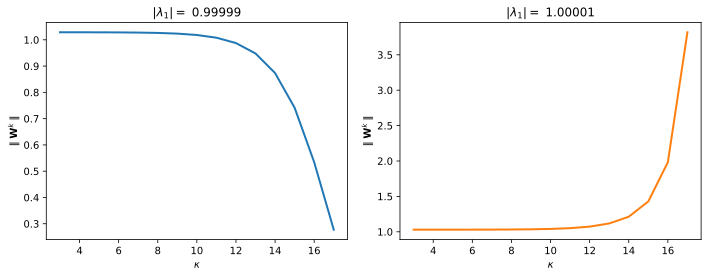

In [2]:
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats("svg")

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
K = range(3, N)
for j, c in enumerate(norms.keys()):
    ax[j].plot(K, [norms[c][k] for k in K], color=f"C{j}", linewidth=2)
    ax[j].set_ylabel(r"$\|\; \boldsymbol{\mathbf{W}}^k \;\|$")
    ax[j].set_xlabel(r"$\kappa$")
    ax[j].set_title(r"$|\lambda_1| =$" + f" {c:.5f}")

fig.tight_layout();